In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
#정규화
from sklearn.preprocessing import MinMaxScaler
#선형회귀
from sklearn.linear_model import LinearRegression
#boston
from sklearn.datasets import load_boston
#릿지회귀
from sklearn.linear_model import Ridge
#라쏘회귀
from sklearn.linear_model import Lasso
#로지스틱
from sklearn.linear_model import LogisticRegression
#iris를 사용하기위한 데이터셋
from sklearn import datasets
#LinearSVC
from sklearn.svm import LinearSVC
# #make_forge를 대신할수 있음
# from sklearn.datasets import make_blobs


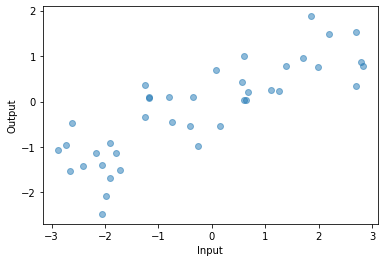

In [2]:
#---------------------------------
#KNN회귀분석

#데이터셋을 만듬
Dataset=mglearn.datasets.make_wave(n_samples=40)
Input,Output=Dataset
# print(Input.shape)
# print(Output.shape)

#데이터셋의 도표화
data_p=plt.scatter(Input,Output,marker='o',alpha=0.5)
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

test_1 Output: [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
test_1 predict: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
test_1 score: 0.8344172446249605


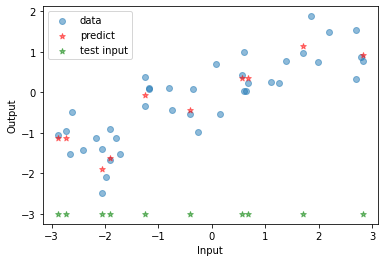

In [3]:
#훈련용,테스트용 데이터셋으로 분류
Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,random_state=0)

#K의 수를 3으로 하고 기계학습
knn_R=KNeighborsRegressor(n_neighbors=3)
knn_R.fit(Input_train,Output_train)

#테스트셋 예측 및 도표화
print('test_1 Output:',Output_test)
Predict=knn_R.predict(Input_test)
print('test_1 predict:',Predict)
print('test_1 score:',knn_R.score(Input_test,Output_test))
zero_y=[-3]*len(Input_test) #테스트셋의 인풋을 표현하기 위해 만든 y label
data_p=plt.scatter(Input,Output,marker='o',alpha=0.5)
predict_p=plt.scatter(Input_test,Predict,c='red',marker="*",alpha=0.5)
input_p=plt.scatter(Input_test,zero_y,c='green',marker="*",alpha=0.5)
plt.legend(handles=(data_p,predict_p,input_p),labels=('data','predict','test input'))
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

test_2 Output: [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133  0.69798591  1.87664889
 -1.41502356  0.77932073  0.09398858  0.03527881]
test_2 predict: [-0.3409073   1.00032374  0.75418806 -2.47196233 -1.52730805 -1.67303415
  0.03497884  0.86893293 -0.98618122 -1.52730805 -0.52734666  0.75418806
 -0.47411033  0.22956153 -0.98618122  1.00032374]
test_2 score: 0.2739276049257199


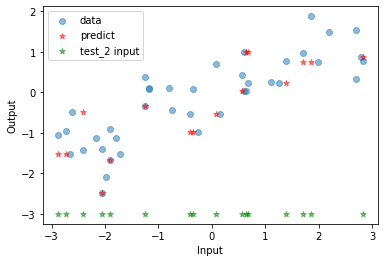

In [4]:
#테스트 사이즈와 K값의 변화
#(default)0.25 to 0.4
Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,test_size=0.4,random_state=0)
#3 to 1
knn_R=KNeighborsRegressor(n_neighbors=1)
knn_R.fit(Input_train,Output_train)

#변화한 K값과 test_size에 대한 예측,R^2값,도표
print('test_2 Output:',Output_test)
Predict_2=knn_R.predict(Input_test)
print('test_2 predict:',Predict_2)
print('test_2 score:',knn_R.score(Input_test,Output_test))
zero_y=[-3]*len(Input_test) #테스트셋의 인풋을 표현하기 위해 만든 y label
data_p=plt.scatter(Input,Output,marker='o',alpha=0.5)
predict_p=plt.scatter(Input_test,Predict_2,c='red',marker="*",alpha=0.5)
input_p=plt.scatter(Input_test,zero_y,c='green',marker="*",alpha=0.5)
plt.legend(handles=(data_p,predict_p,input_p),labels=('data','predict','test_2 input'))
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

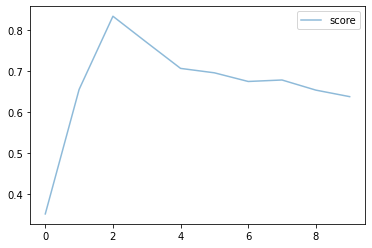

In [5]:
#K에 따른 R^2값 측정
Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,random_state=0)
K_range=range(1,11)
R_2=list()
for K in K_range:
    knn_R=KNeighborsRegressor(n_neighbors=K)
    knn_R.fit(Input_train,Output_train)
    score=knn_R.score(Input_test,Output_test)
    R_2.append(score)
plt.plot(R_2,alpha=0.5)
#범례 붙일때는 리스트 안에 넣어야됨
plt.legend(['score'])
plt.show()

In [6]:
def make_kn_p(K,N=40):
    Dataset=mglearn.datasets.make_wave(n_samples=N)
    Input,Output=Dataset
    Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,random_state=42)
    knn_R=KNeighborsRegressor(n_neighbors=K)
    knn_R.fit(Input_train,Output_train)
    knn_test_score=knn_R.score(Input_test,Output_test)
    knn_train_score=knn_R.score(Input_train,Output_train)
    title='KNeighborsRegressor/'+'train score :'+'%.2f'%knn_train_score+', test score :'+'%.2f'%knn_test_score
    plt.title(title)
    #선으로 도표그리기
    line=np.linspace(-3,3,1000).reshape(-1,1)
    A=plt.scatter(Input_train,Output_train,c='b',marker='^',alpha=0.5)
    B=plt.scatter(Input_test,Output_test,c='r',marker='v',alpha=0.5)
    C,=plt.plot(line,knn_R.predict(line),c='g')
    #plot은 ,을 붙어야 범례가 붙음.
    plt.legend(handles=(A,B,C),labels=(['tarin','test','predict']))
    plt.show()

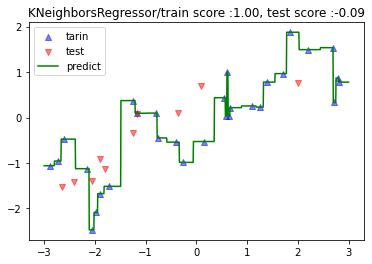

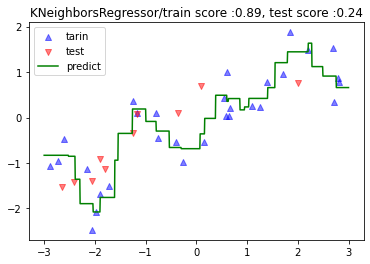

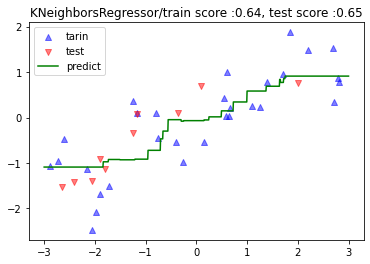

In [7]:
#KNN회귀의 K값 변화에 따른 변화

#K=1
make_kn_p(1)

#K=3
make_kn_p(3)

#K=10
make_kn_p(10)

In [8]:
#---------------------------------
#선형회귀

#데이터셋을 만듬
Dataset=mglearn.datasets.make_wave(n_samples=60)
Input,Output=Dataset

#훈련용,테스트용으로 분류
Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,random_state=42)

#선형회귀로 훈련
lr=LinearRegression().fit(Input_train,Output_train)

#score확인
print('train score:',lr.score(Input_train,Output_train))
print('test score:',lr.score(Input_test,Output_test))

#선형회귀 일차방정식의 기울기와 절편
print('lr.coef_:',lr.coef_)#기울기
print('lr.intercept_:',lr.intercept_)#절편

train score: 0.6700890315075756
test score: 0.65933685968637
lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


               0
count  60.000000
mean   -0.194995
std     1.832582
min    -2.876493
25%    -1.893048
50%    -0.311333
75%     1.284318
max     2.819459
(60, 1)
(1000, 1)
(45, 1)
(45,)


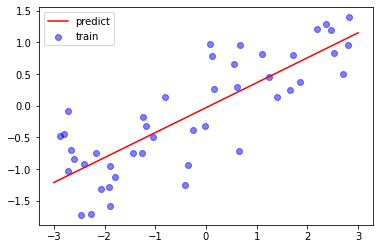

In [9]:
#선형회귀 도표
#도표를 만들기 위해 데이터의 범위를 확인
df_in=pd.DataFrame(Input)
print(df_in.describe())#x축 범위만 알면됨
print(Input.shape)
#input(x축)의 모양에 맞춰 N x 1 모양을 만들어주어야 함 by reshape
line=np.linspace(-3,3,1000).reshape(-1,1)
print(line.shape)
print(Input_train.shape)
print(Output_train.shape)
#선형 데이터가 만들어졌으니 도표를 그림
plt.scatter(Input_train,Output_train,c='b',marker='o',alpha=0.5)
plt.plot(line,lr.predict(line),c='r')
plt.legend(['predict','train'])
plt.show()

In [10]:

def make_lr_p(N):
    Dataset=mglearn.datasets.make_wave(n_samples=N)
    Input,Output=Dataset
    Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,random_state=42)
    lr=LinearRegression().fit(Input_train,Output_train)

    lr_test_score=lr.score(Input_test,Output_test)
    lr_train_score=lr.score(Input_train,Output_train)
    title='LinearRegression/'+'train score :'+'%.2f'%lr_train_score+', test score :'+'%.2f'%lr_test_score
    plt.title(title)

    line=np.linspace(-3,3,1000).reshape(-1,1)
    plt.scatter(Input_train,Output_train,c='b',marker='o',alpha=0.5)
    plt.plot(line,lr.predict(line),c='r')
    plt.legend(['predict','train'])
    plt.show()

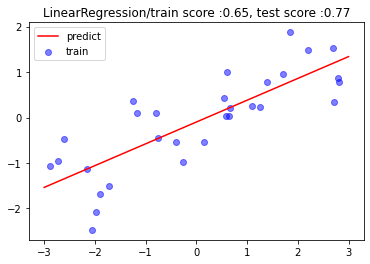

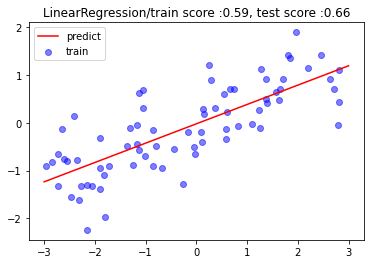

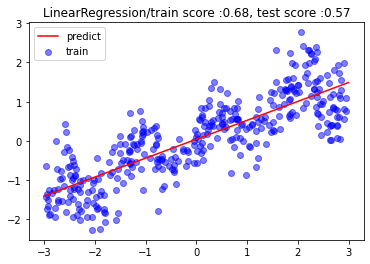

In [11]:
#N에 따른 선형회귀 모델
#N=40
make_lr_p(40)
#N=100
make_lr_p(100)
#N=500
make_lr_p(500)

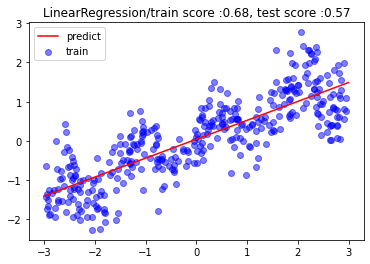

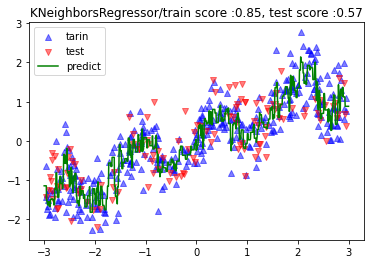

In [12]:
#선형회귀와 KNN회귀의 비교
#선형회귀 N=500
make_lr_p(500)

#KNN회귀 N=500,k=3
make_kn_p(3,500)

In [13]:
#보스톤 주택 가격 예측
boston=load_boston()
print(type(boston))
# print(boston)
#보스톤 주택의 특징
Input=boston.data
#특징에 따른 가격
Output=boston.target

print(Input.shape)
print(Output.shape)
print(boston.feature_names)
boston_df=pd.DataFrame(Input,columns=boston.feature_names)
print(boston_df.head())

<class 'sklearn.utils.Bunch'>
(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


(506,)
<class 'pandas.core.series.Series'>
(506, 1)


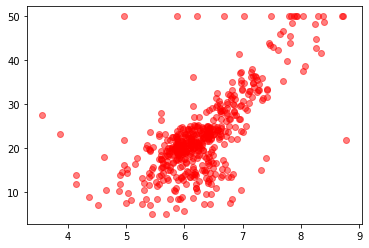

In [14]:
#보스턴 데이터에서 방의 개수로 산점도 그래프 작성
dot1=plt.scatter(boston_df['RM'],Output,c='r',alpha=0.5)


print(boston_df['RM'].shape)
#pandas series 타입임
print(type(boston_df['RM']))

#RM 데이터가 1행에 다 들어있으므로 열로 바꿔줘야됨
#reshape 함수를 사용하기 위해 넘파이 형식으로 바꿔줌
new_x=np.reshape(boston_df['RM'].to_numpy(),(-1,1))
print(new_x.shape)

#훈련용, 테스트용 분류
Input_train,Input_test,Output_train,Output_test=train_test_split(new_x,Output,random_state=0)



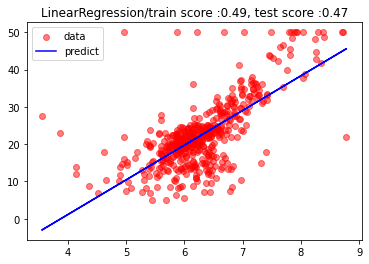

In [15]:
#선형회귀로
dot=plt.scatter(boston_df['RM'],Output,c='r',alpha=0.5)
lr=LinearRegression()
lr.fit(Input_train,Output_train)
# line=np.linspace(4,9,1000).reshape(-1,1)
# plt.plot(line,lr.predict(line),c='b') #line 으로 해도 똑같지만 범위지정을 직접 해줘야 하는 번거로움이 있다. 그냥 주워진 변수를 사용할것
l,=plt.plot(new_x,lr.predict(new_x),c='b')
lr_test_score=lr.score(Input_test,Output_test)
lr_train_score=lr.score(Input_train,Output_train)
title='LinearRegression/'+'train score :'+'%.2f'%lr_train_score+', test score :'+'%.2f'%lr_test_score
plt.title(title)
plt.legend(handles=(dot,l),labels=(['data','predict']))
plt.show()

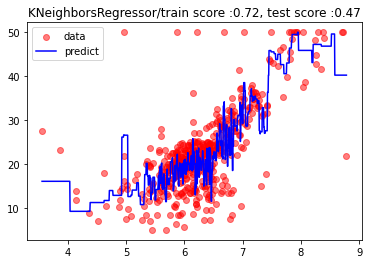

In [16]:
#KNN회귀로 K=3
dot=plt.scatter(boston_df['RM'],Output,c='r',alpha=0.5)
knn_R=KNeighborsRegressor(n_neighbors=3)
knn_R.fit(Input_train,Output_train)
#knn은 line이 필요함..
line=np.linspace(min(boston_df['RM']),max(boston_df['RM']),1000).reshape(-1,1)
kn,=plt.plot(line,knn_R.predict(line),c='b')
kn_test_score=knn_R.score(Input_test,Output_test)
kn_train_score=knn_R.score(Input_train,Output_train)
title='KNeighborsRegressor/'+'train score :'+'%.2f'%kn_train_score+', test score :'+'%.2f'%kn_test_score
plt.title(title)
plt.legend(handles=(dot,l),labels=(['data','predict']))
plt.show()

In [17]:
#---------------------------------
#선형회귀 모델 릿지,라소
#보스톤 확장 데이터
boston_ex=mglearn.datasets.load_extended_boston()
print(type(boston_ex))
Input,Output=boston_ex
#104열 506행. 데이터의 특성이 많기 때문에(104) 도표로는 보여주기가 힘듬
print(Input.shape)
print(Output.shape)
Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,random_state=0)

<class 'tuple'>
(506, 104)
(506,)


In [18]:
#릿지 회귀 모든 특징을 0에 가깝게 만들어버림
ridge=Ridge().fit(Input_train,Output_train)
print('ridge train score:',ridge.score(Input_train,Output_train))
print('ridge test score:',ridge.score(Input_test,Output_test))

#선형 회귀
lr=LinearRegression().fit(Input_train,Output_train)
print('lr train score:',lr.score(Input_train,Output_train))
print('lr test score:',lr.score(Input_test,Output_test))

#knn 회귀
knn_R=KNeighborsRegressor(n_neighbors=3).fit(Input_train,Output_train)
print('knn train score:',knn_R.score(Input_train,Output_train))
print('knn test score:',knn_R.score(Input_test,Output_test))


ridge train score: 0.8857966585170941
ridge test score: 0.7527683481744751
lr train score: 0.9520519609032728
lr test score: 0.6074721959666309
knn train score: 0.8954416051768477
knn test score: 0.6111335176002934


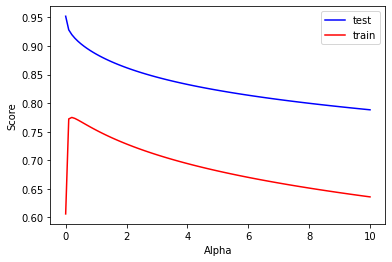

In [19]:
#릿지회귀 Alpha 값에 따른 Score 변화
Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,random_state=0)
Alpha=np.linspace(0,10,100)
Score_train=list()
Score_test=list()
for a in Alpha:
    ridge=Ridge(alpha=a).fit(Input_train,Output_train)
    score1=ridge.score(Input_test,Output_test)
    score2=ridge.score(Input_train,Output_train)
    Score_test.append(score1)
    Score_train.append(score2)
    
test,=plt.plot(Alpha,Score_train,c='b')
train,=plt.plot(Alpha,Score_test,c='r')
#범례 붙일때는 리스트 안에 넣어야됨
plt.legend(handles=(test,train),labels=(['test','train']))
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()

In [20]:
#라쏘 회귀 낮은 값을 가진 특성은 0으로 만들어버림
#보스턴 확장 데이터


#alpha=1
lasso=Lasso().fit(Input_train,Output_train)
print('lasso train score:',lasso.score(Input_train,Output_train))
print('lasso test score:',lasso.score(Input_test,Output_test))
#사용한 특성의 갯수를 추출
print('use feature :',sum(lasso.coef_!=0))

#alpha=0.01
lasso=Lasso(alpha=0.01,max_iter=100000).fit(Input_train,Output_train)
print('lasso train score:',lasso.score(Input_train,Output_train))
print('lasso test score:',lasso.score(Input_test,Output_test))
print('use feature :',sum(lasso.coef_!=0))

#alpha=0.0001
lasso=Lasso(alpha=0.0001,max_iter=100000).fit(Input_train,Output_train)
print('lasso train score:',lasso.score(Input_train,Output_train))
print('lasso test score:',lasso.score(Input_test,Output_test))
print('use feature :',sum(lasso.coef_!=0))

lasso train score: 0.29323768991114607
lasso test score: 0.20937503255272294
use feature : 4
lasso train score: 0.8962226511086497
lasso test score: 0.7656571174549982
use feature : 33
lasso train score: 0.9507158754515463
lasso test score: 0.6437467421272821
use feature : 96


ipykernel_launcher:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\140407\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\140407\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778.2331250146773, tolerance: 3.233182126649076
  positive)


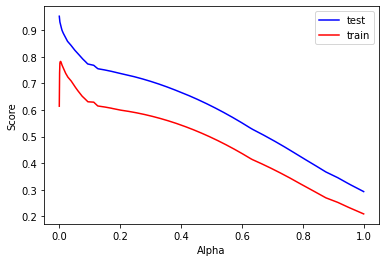

In [21]:
#라쏘회귀 Alpha 값에 따른 Score 변화
Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,random_state=0)
Alpha=np.linspace(0,1,1000)
Score_train=list()
Score_test=list()
for a in Alpha:
    lasso=Lasso(alpha=a,max_iter=100000).fit(Input_train,Output_train)
    score1=lasso.score(Input_test,Output_test)
    score2=lasso.score(Input_train,Output_train)
    Score_test.append(score1)
    Score_train.append(score2)
    
test,=plt.plot(Alpha,Score_train,c='b')
train,=plt.plot(Alpha,Score_test,c='r')
#범례 붙일때는 리스트 안에 넣어야됨
plt.legend(handles=(test,train),labels=(['test','train']))
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()

In [22]:
#---------------------------------
#로지스틱 회귀분석(분류)
iris=datasets.load_iris()

print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
#1가지 특성만 가져옴 (petal length를 가져오기로 함)
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
print(iris_df.head())
iris_data_pl=iris_df['petal length (cm)']
print(iris_data_pl.head())
#로지스틱 회귀분석을 위해 1개의 output=virginica를 재외하고 0으로 만듬
OutPut=iris.target==2
print(OutPut)

#모양 확인
print(iris_data_pl.shape)
print(OutPut.shape)

#150,1꼴로 데이터 변환
iris_data_pl=np.reshape(iris_data_pl.to_numpy(),(-1,1))
print(iris_data_pl.shape)

#로지스틱 회귀 훈련
log_reg=LogisticRegression().fit(iris_data_pl,OutPut)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal length (cm), dtype: float64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False Fal

(1000, 2)
          0             1
0  0.999999  9.012733e-07
1  0.999999  9.205925e-07
2  0.999999  9.403258e-07
3  0.999999  9.604821e-07
4  0.999999  9.810704e-07


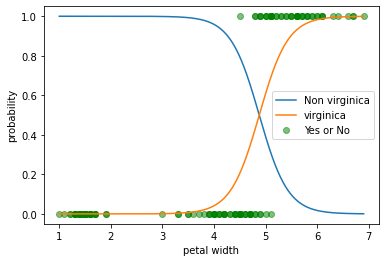

In [23]:
#꽃잎의 넓이에 대해 로지스틱 회귀모델을 이용해 추정

log_reg=LogisticRegression().fit(iris_data_pl,OutPut)
Input_pl=np.linspace(min(iris_data_pl),max(iris_data_pl),1000).reshape(-1,1)
#각input에 대한 확률을 예측
p=log_reg.predict_proba(Input_pl)
print(p.shape)
#0열은 False, 1열은 True 라고 생각
print(pd.DataFrame(p).head())
p=pd.DataFrame(p)
#도표화

plt.scatter(iris_data_pl,OutPut,c='g',alpha=0.5,label='Yes or No')
plt.plot(Input_pl,p[0],label='Non virginica')
plt.plot(Input_pl,p[1],label='virginica')
plt.ylabel('probability')
plt.xlabel('petal width')
plt.legend()
plt.show()


(26, 2)
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
C:\Users\140407\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


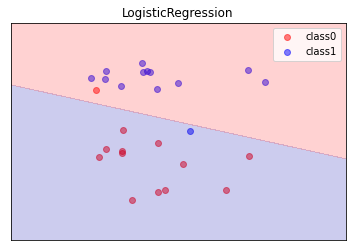

In [24]:
#로지스틱 회귀분류 도표화

#임의의 데이터 생성(make_forge는 30개로 고정, make_wave는 n_samples로 정할수있음)
data,label=mglearn.datasets.make_forge()
#data[0],data[1]에 각각 데이터가 담겨있고 라벨에 결과값이 있는 형태
print(data.shape)
print(label)

#로지스틱 회귀분류로 훈련
log_reg=LogisticRegression().fit(data,label)
#분류하기위해 라벨을 붙여서 데이터프레임 만듬
temp_df=pd.DataFrame(data,label)
#붙인라벨에 따라서 df 하나씩 생성
temp_df_0=temp_df.loc[0]
temp_df_1=temp_df.loc[1]

#도표화
class0=plt.scatter(temp_df_0[0],temp_df_0[1],c='r',label='class0',alpha=0.5)
class1=plt.scatter(temp_df_1[0],temp_df_1[1],c='b',label='class1',alpha=0.5)

#분류
mglearn.plots.plot_2d_separator(log_reg,data,fill=True,alpha=0.2)#분류모델,train_input,채움,투명도

plt.title('LogisticRegression')
plt.legend()
plt.show()



(26, 2)
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
C:\Users\140407\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\140407\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


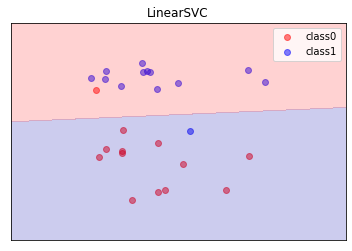

In [25]:
#LinearSVC회귀분류 도표화

#임의의 데이터 생성(make_forge는 30개로 고정, make_wave는 n_samples로 정할수있음)
data,label=mglearn.datasets.make_forge()
#data[0],data[1]에 각각 데이터가 담겨있고 라벨에 결과값이 있는 형태
print(data.shape)
print(label)

##LinearSVC 회귀분류로 훈련
lSVC=LinearSVC().fit(data,label)
#분류하기위해 라벨을 붙여서 데이터프레임 만듬
temp_df=pd.DataFrame(data,label)
#붙인라벨에 따라서 df 하나씩 생성
temp_df_0=temp_df.loc[0]
temp_df_1=temp_df.loc[1]

#도표화
class0=plt.scatter(temp_df_0[0],temp_df_0[1],c='r',label='class0',alpha=0.5)
class1=plt.scatter(temp_df_1[0],temp_df_1[1],c='b',label='class1',alpha=0.5)

#분류
mglearn.plots.plot_2d_separator(lSVC,data,fill=True,alpha=0.2)#분류모델,train_input,채움,투명도

plt.title('LinearSVC')
plt.legend()
plt.show()

In [26]:
#cancer data 분류

cancer=datasets.load_breast_cancer()
#특성이 30개라서 도표로는 보여주기 힘듬
print(cancer.data.shape)
Input_train,Input_test,Output_train,Output_test=train_test_split(cancer.data,cancer.target,random_state=42)

#로지스틱회귀로 훈련 C=1
log_reg=LogisticRegression(C=1,max_iter=5000).fit(Input_train,Output_train)
score1=log_reg.score(Input_test,Output_test)
score2=log_reg.score(Input_train,Output_train)
print('test score:',score1)
print('train score:',score2)

#로지스틱회귀로 훈련 C=100
log_reg=LogisticRegression(C=100,max_iter=5000).fit(Input_train,Output_train)
score1=log_reg.score(Input_test,Output_test)
score2=log_reg.score(Input_train,Output_train)
print('test score:',score1)
print('train score:',score2)

(569, 30)
test score: 0.965034965034965
train score: 0.960093896713615
test score: 0.965034965034965
train score: 0.9788732394366197
C:\Users\140407\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
